100%|██████████| 170498071/170498071 [00:14<00:00, 11751690.82it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified
Using cuda device


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RegNet_X_400MF_Weights.IMAGENET1K_V1`. You can also use `weights=RegNet_X_400MF_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/regnet_x_400mf-adf1edd5.pth" to /root/.cache/torch/hub/checkpoints/regnet_x_400mf-adf1edd5.pth
100%|██████████| 21.3M/21.3M [00:00<00:00, 25.3MB/s]


RegNet(
  (stem): SimpleStemIN(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (trunk_output): Sequential(
    (block1): AnyStage(
      (block1-0): ResBottleneckBlock(
        (proj): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(1, 1), stride=(2, 2), bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (f): BottleneckTransform(
          (a): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (b): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=2, bias=False)
            

<ipython-input-1-ee2599eeb39b>:389: RuntimeWarning: divide by zero encountered in log
  loss =  np.sum( np.log( np.absolute(pp -1 + Y) )  )
<ipython-input-1-ee2599eeb39b>:396: RuntimeWarning: divide by zero encountered in log
  loss =  np.sum( np.log( np.absolute(pp -1 + Ytest) )  )


SigmoidNAG without QG Testing Accuray at   3 iterations is 0.248300000000 with loss: -inf
SigmoidNAG without QG Testing Accuray at   4 iterations is 0.248300000000 with loss: -inf
SigmoidNAG without QG Testing Accuray at   5 iterations is 0.248300000000 with loss: -inf
SigmoidNAG without QG Testing Accuray at   6 iterations is 0.248300000000 with loss: -inf
SigmoidNAG without QG Testing Accuray at   7 iterations is 0.248300000000 with loss: -inf
SigmoidNAG without QG Testing Accuray at   8 iterations is 0.248300000000 with loss: -inf
SigmoidNAG without QG Testing Accuray at   9 iterations is 0.248300000000 with loss: -inf
SigmoidNAG without QG Testing Accuray at  10 iterations is 0.248300000000 with loss: -inf
SigmoidNAG without QG Testing Accuray at  11 iterations is 0.248300000000 with loss: -inf
SigmoidNAG without QG Testing Accuray at  12 iterations is 0.248300000000 with loss: -inf
SigmoidNAG without QG Testing Accuray at  13 iterations is 0.248300000000 with loss: -inf
SigmoidNAG

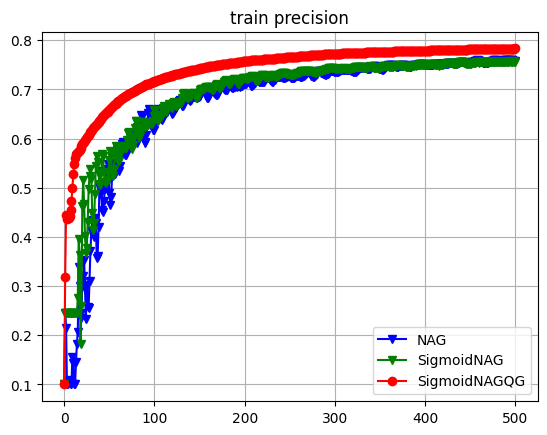

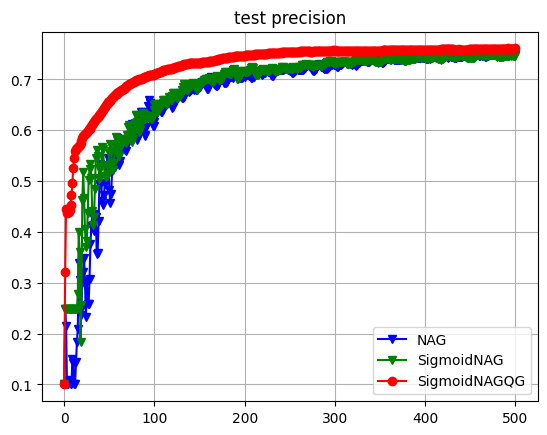

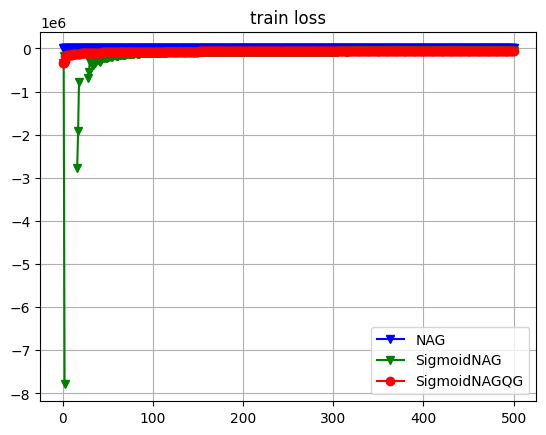

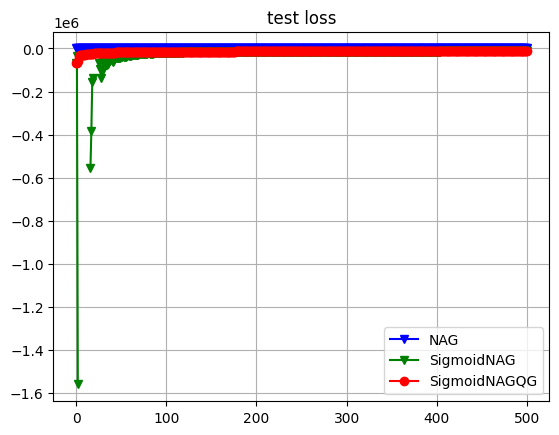

In [1]:

import csv
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import models, datasets
import torchvision.transforms as trnsfrms
from torchvision.transforms import ToTensor, Resize, Lambda

#trnsfrms = trnsfrms.Compose([Resize(224), ToTensor(),  Lambda(lambda x: x.repeat(3, 1, 1) ) ])  # Grayscale Images like MNIST and USPS
trnsfrms = trnsfrms.Compose([Resize(224), ToTensor(), ])                                       # Color Images like CIFAR10
#trnsfrms = trnsfrms.Compose([ ToTensor(), ]) 

# Download training data from open datasets.FashionMNIST.MNIST.USPS  / CIFAR10
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform= trnsfrms
)

# Download test data from open datasets.FashionMNIST.MNIST
testing_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform= trnsfrms
)

batch_size = 512

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(testing_data, batch_size=batch_size)

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

#model = models.regnet_x_400mf(pretrained=True)  #Linear(in_features=400,
#model = models.regnet_y_400mf(pretrained=True)  #(fc): Linear(in_features=440,
#model = models.regnet_x_800mf(pretrained=True)  #Linear(in_features=672,
#model = models.regnet_y_800mf(pretrained=True)  #(fc): Linear(in_features=784,
#model = models.regnet_y_1_6gf(pretrained=True)  #Linear(in_features=888,
#model = models.regnet_x_1_6gf(pretrained=True)  #Linear(in_features=912,
#model = models.regnet_x_3_2gf(pretrained=True)  #Linear(in_features=1008,

#### ConvNet as fixed feature extractor ####
model = models.regnet_x_400mf(pretrained=True)  
for param in model.parameters():
    param.requires_grad = False
# Parameters of newly constructed modules have requires_grad=True by default
model.fc = nn.Sequential(*list(model.fc.children())[:-1])
model = model.to(device)
print(model)
print(model.fc)
print(type(model.fc))


# Save the raw dataset: USPS MNIST CIFAR10
train_dataset = []
size = len(train_dataloader.dataset)
num_batches = len(train_dataloader)
model.eval()
with torch.no_grad():
    for X, y in train_dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        print(f"Shape of model(X) [N, C, H, W]: {pred.shape}")
        print(f"Shape of y: {y.shape} {y.dtype}")
        pred = torch.reshape(pred, (pred.shape[0], -1) )
        y = torch.reshape(y, (y.shape[0], -1) )
        print(f"Shape of model(X): {pred.shape} {pred.dtype}")
        print(f"Shape of y: {y.shape} {y.dtype}")

        train_dataset += torch.cat( (y, pred ), 1)
        print(f"Shape of train_dataset: {len(train_dataset)}, {len(train_dataset[0])}")

print("train_dataset :" + str(len(train_dataset)) + ",\t" + str(len(train_dataset[0])) )
print(type(train_dataset))
with open('REGNET_X_400MF_CIFAR10_TRAINING.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    for i in range( len(train_dataset)):                                   #len(train_dataset)):
      writer.writerow(train_dataset[i].detach().cpu().numpy())
csvfile.close()



# Save the raw dataset: USPS MNIST CIFAR10
test_dataset = []
size = len(test_dataloader.dataset)
num_batches = len(test_dataloader)
model.eval()
with torch.no_grad():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        print(f"Shape of model(X) [N, C, H, W]: {pred.shape}")
        print(f"Shape of y: {y.shape} {y.dtype}")
        pred = torch.reshape(pred, (pred.shape[0], -1) )
        y = torch.reshape(y, (y.shape[0], -1) )
        print(f"Shape of model(X): {pred.shape} {pred.dtype}")
        print(f"Shape of y: {y.shape} {y.dtype}")

        test_dataset += torch.cat( (y, pred ), 1)
        print(f"Shape of test_dataset: {len(test_dataset)}, {len(test_dataset[0])}")

print("test_dataset :" + str(len(test_dataset)) + ",\t" + str(len(test_dataset[0])) )
print(type(test_dataset))
with open('REGNET_X_400MF_CIFAR10_TESTING.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    for i in range(len(test_dataset)):
      writer.writerow(test_dataset[i].detach().cpu().numpy())
csvfile.close()






# coding=utf8

import os
import math
import time
import random

from copy import deepcopy
from math import log, exp, pow, sqrt

import matplotlib
#matplotlib.use('pdf')
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True)



#hlambda = lambda x:1.0/(1+exp(-x))
#Sigmoid(x) ~ poly3 = 0.5 + 0.10679534503216294.*x + -0.00038503259805075.*x.^3; (lambda = 128)
def hlambda(x):
    x[x>+8] = +8
    x[x<-8] = -8
    res = 1 / (1 + np.exp(-x) )
    #res = 5.0000e-01  + 0.10679534503216294 * x  - 0.00038503259805075 * np.multiply(np.multiply(x,  x), x)
    return res 



import csv
epsilon = 1e-10
num_iter = 500


with open("REGNET_X_400MF_CIFAR10_TRAINING.csv",'r') as csvfile:
#with open("REGNET_X_400MF_CIFAR10_TESTING.csv",'r') as csvfile:
    reader = csv.reader(csvfile)
    traindata = []
    for row in reader:
        row = [float(x) for x in row]
        traindata.append(row)
csvfile.close()
with open("REGNET_X_400MF_CIFAR10_TESTING.csv", 'r') as csvfile:
#with open("REGNET_X_400MF_CIFAR10_TRAININGfirst8192.csv",'r') as csvfile:
    reader = csv.reader(csvfile)
    testdata = []
    for row in reader:
        row = [float(x) for x in row]
        testdata.append(row)
csvfile.close()





#traindata = traindata[:6144]
TrainX = [row[1:] for row in traindata[:]]
TestX = [row[1:] for row in testdata[:]]






X = []
Xtest  = []


for (rowidx, row) in enumerate(TrainX):
    #TrainData.append( [ trainy[rowidx] ] + row )
    X.append( [ 1.0 ] + row )
for (rowidx, row) in enumerate(TestX):
    #TestData.append( [ testy[rowidx] ] + row )
    Xtest.append( [ 1.0 ] + row )
   
#X = X[:]
X = np.matrix(X)
Xtest = np.matrix(Xtest)


ytrain = [int(row[0]) for row in traindata[:]]
ytest = [int(row[0]) for row in testdata[:]]

#y = self.one_hot(y)
Y = []
for rowidx in range( len(traindata) ):
    row = []
    for colidx in range( len( set(ytrain + ytest) ) ):
        if colidx == ytrain[rowidx]:
            row.append( 1 )
        else:
            row.append( 0 )
    Y.append( row )

#Y = Y[:]
Y = np.matrix(Y)

Ytest = []
for rowidx in range( len(testdata) ):
    row = []
    for colidx in range( len( set(ytrain + ytest) ) ):
        if colidx == ytest[rowidx]:
            row.append( 1 )
        else:
            row.append( 0 )
    Ytest.append( row )
Ytest = np.matrix(Ytest)


#     Step 2. Extract X and Y from data



def precision(vec0, vec1):
    if len(vec0) != len(vec1):
        return -1
    totalnum = len(vec0)
    rightnum = 0.0
    for idx in range(totalnum):
        if vec0[idx] == vec1[idx]:
            rightnum += 1
    return rightnum / totalnum



# ======================================= Raw NAG without QG ======================================= 
# Build the initial weight matrix
velocity = []
for rowidx in range( len(set(ytrain)) ):
    vrow = []
    for colidx in range( X.shape[1] ):
        vrow.append( 0.0 )
    velocity.append(vrow)
velocity = np.matrix( velocity )
weights = []
for rowidx in range( len(set(ytest+ytrain)) ):
    wrow = []
    for colidx in range( X.shape[1] ):
        wrow.append( 0.0 )
    weights.append(wrow)
weights = np.matrix( weights )


NAG_result_prec_train = []
NAG_result_loss_train = []
z = np.dot(X, weights.T).reshape(-1,len(set(ytrain+ytest)))
probs = np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)
loss =   -1 * np.mean(np.multiply(Y,  np.log(probs)) )
NAG_result_loss_train.append( loss )
NAG_result_prec_train.append( precision(np.argmax(probs, axis=1) ,ytrain) )

NAG_result_prec_test = []
NAG_result_loss_test = []
z = np.dot(Xtest, weights.T).reshape(-1,len(set(ytest)))
probs = np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)
loss =   -1 * np.mean(np.multiply(Ytest,  np.log(probs)) )
NAG_result_loss_test.append( loss )
NAG_result_prec_test.append( precision(np.argmax(probs, axis=1) ,ytest) )


alpha0 = 0.01
alpha1 = (1. + sqrt(1. + 4.0 * alpha0 * alpha0)) / 2.0
start_time = time.time()
for it in range(num_iter):
    # np.dot(X, np.matrix(weights).T)  #.reshape(-1,len(self.classes))
    z = np.dot(X, velocity.T).reshape(-1,len(set(ytrain+ytest)) )
    
    zi = z - np.max(z,-1)
    h = np.exp(zi) / np.sum(np.exp(zi), axis=1)

    gradient = -(h - Y).T.dot(X)


    eta = (1 - alpha0) / alpha1
    gamma = 1.0/(it+1)/ X.shape[0]
    
    MG = gradient          
    # should be 'plus', 'cause to compute the MLE  
    MtmpW = weights + (gamma + 0.0) * MG            
    weights = (1.0-eta)*MtmpW + np.multiply(eta, velocity)
    velocity = MtmpW

    alpha0 = alpha1
    alpha1 = (1. + sqrt(1. + 4.0 * alpha0 * alpha0)) / 2.0

    zz = np.dot(X, weights.T).reshape(-1,len(set(ytrain)) )
    zzi = zz - np.max(zz,-1)
    pp = np.exp(zzi) / np.sum(np.exp(zzi), axis=1)
    loss =  -1 * np.mean(np.multiply(Y,  np.log(pp)) )
    prec = precision(np.argmax(pp, axis=1) ,ytrain)
    NAG_result_loss_train.append( loss )
    NAG_result_prec_train.append( prec )
    #print(' Training Accuray at {:3d} iterations is {:.12f} with loss: {:.12f}'.format(1+it, prec, loss) )
    zz = np.dot(Xtest, weights.T).reshape(-1,len(set(ytest)) )
    zzi = zz - np.max(zz,-1)
    pp = np.exp(zzi) / np.sum(np.exp(zzi), axis=1)
    loss =  -1 * np.mean(np.multiply(Ytest,  np.log(pp)) )
    prec = precision(np.argmax(pp, axis=1) ,ytest)
    NAG_result_loss_test.append( loss )
    NAG_result_prec_test.append( prec )
    print(' Testing Accuray at {:2d} iterations is {:.12f} with loss: {:.12f}'.format(1+it, prec, loss) )

#############################################################################################################3
# ======================================= SigmoidNAG without QG ======================================= 
# Build the initial weight matrix
velocity = []
for rowidx in range( len(set(ytrain)) ):
    vrow = []
    for colidx in range( X.shape[1] ):
        vrow.append( 0.0 )
    velocity.append(vrow)
velocity = np.matrix( velocity )
weights = []
for rowidx in range( len(set(ytest+ytrain)) ):
    wrow = []
    for colidx in range( X.shape[1] ):
        wrow.append( 0.0 )
    weights.append(wrow)
weights = np.matrix( weights )



SigmoidNAG_result_prec_train = []
SigmoidNAG_result_loss_train = []
z = np.dot(X, weights.T).reshape(-1,len(set(ytrain+ytest)))
probs =  1.0 / ( 1.0 + np.exp(-z) ) 
loss =   np.sum( np.log( np.absolute(probs -1 + Y) )  )
SigmoidNAG_result_loss_train.append( loss )
SigmoidNAG_result_prec_train.append( precision(np.argmax(probs, axis=1) ,ytrain) )

SigmoidNAG_result_prec_test = []
SigmoidNAG_result_loss_test = []
z = np.dot(Xtest, weights.T).reshape(-1,len(set(ytest)))
probs =  1.0 / ( 1.0 + np.exp(-z) ) 
loss =   np.sum( np.log( np.absolute(probs -1 + Ytest) )  )
SigmoidNAG_result_loss_test.append( loss )
SigmoidNAG_result_prec_test.append( precision(np.argmax(probs, axis=1) ,ytest) )


alpha0 = 0.01
alpha1 = (1. + sqrt(1. + 4.0 * alpha0 * alpha0)) / 2.0
start_time = time.time()
for it in range(num_iter):

    # np.dot(X, np.matrix(weights).T)  #.reshape(-1,len(self.classes))
    z = np.dot(X, velocity.T).reshape(-1,len(set(ytest+ytrain)) ) 
    
    #P = 1.0 / ( 1.0 + np.exp(-z) ) 
    P = hlambda(z)

    
    gradient = (Y - P).T.dot(X)
   

    eta = (1 - alpha0) / alpha1
    gamma = 1.0/(it+1)/ X.shape[0]
            
    # should be 'plus', 'cause to compute the MLE
    MtmpW = weights + (gamma + 0.0) * gradient               
    weights = (1.0-eta)*MtmpW + np.multiply(eta, velocity)
    velocity = MtmpW

    alpha0 = alpha1
    alpha1 = (1. + sqrt(1. + 4.0 * alpha0 * alpha0)) / 2.0



    zz = np.dot(X, weights.T).reshape(-1,len(set(ytest+ytrain)) )
    pp = 1.0 / ( 1.0 + np.exp(-zz) ) 
    loss =  np.sum( np.log( np.absolute(pp -1 + Y) )  )
    prec = precision(np.argmax(pp, axis=1) ,ytrain)
    SigmoidNAG_result_loss_train.append( loss )
    SigmoidNAG_result_prec_train.append( prec )
    #print('SigmoidNAG without QG Training Accuray at {:3d} iterations is {:.12f} with loss: {:.12f}'.format(1+it, prec, loss) )
    zz = np.dot(Xtest, weights.T).reshape(-1,len(set(ytest)) )
    pp = 1.0 / ( 1.0 + np.exp(-zz) ) 
    loss =  np.sum( np.log( np.absolute(pp -1 + Ytest) )  )
    prec = precision(np.argmax(pp, axis=1) ,ytest)
    SigmoidNAG_result_loss_test.append( loss )
    SigmoidNAG_result_prec_test.append( prec )
    print('SigmoidNAG without QG Testing Accuray at {:3d} iterations is {:.12f} with loss: {:.12f}'.format(1+it, prec, loss) )


#############################################################################################################3

# ======================================= SigmoidNAG with QG ======================================= 
# Build the initial weight matrix
velocity = []
for rowidx in range( len(set(ytrain)) ):
    vrow = []
    for colidx in range( X.shape[1] ):
        vrow.append( 0.0 )
    velocity.append(vrow)
velocity = np.matrix( velocity )
weights = []
for rowidx in range( len(set(ytest+ytrain)) ):
    wrow = []
    for colidx in range( X.shape[1] ):
        wrow.append( 0.0 )
    weights.append(wrow)
weights = np.matrix( weights )


SigmoidNAGQG_result_prec_train = []
SigmoidNAGQG_result_loss_train = []
z = np.dot(X, weights.T).reshape(-1,len(set(ytrain+ytest)))
probs =  1.0 / ( 1.0 + np.exp(-z) ) 
loss =   np.sum( np.log( np.absolute(probs -1 + Y) )  ) 
SigmoidNAGQG_result_loss_train.append( loss )
SigmoidNAGQG_result_prec_train.append( precision(np.argmax(probs, axis=1) ,ytrain) )

SigmoidNAGQG_result_prec_test = []
SigmoidNAGQG_result_loss_test = []
z = np.dot(Xtest, weights.T).reshape(-1,len(set(ytest)))
probs =  1.0 / ( 1.0 + np.exp(-z) ) 
loss =    np.sum( np.log( np.absolute(probs -1 + Ytest) )  )  
SigmoidNAGQG_result_loss_test.append( loss )
SigmoidNAGQG_result_prec_test.append( precision(np.argmax(probs, axis=1) ,ytest) )

print('X := ')
print(X)
start_time = time.time()
XTX = X.T.dot(X)
print('XTX := ')
print(XTX)
#B = np.sum((XTX * .5), axis=0) + epsilon
invBrow = 1.0 / ( epsilon +  .25 * np.sum(XTX, axis=0) )
print('invBrow := ')
print(invBrow)

alpha0 = 0.01
alpha1 = (1. + sqrt(1. + 4.0 * alpha0 * alpha0)) / 2.0
start_time = time.time()
for it in range(num_iter):

    # np.dot(X, np.matrix(weights).T)  #.reshape(-1,len(self.classes))
    z = np.dot(X, velocity.T).reshape(-1,len(set(ytest+ytrain)) ) 
    
    #P = 1.0 / ( 1.0 + np.exp(-z) ) 
    P = hlambda(z)

    
    gradient = (Y - P).T.dot(X)
  
    MG = np.multiply(invBrow, gradient)  

    eta = (1 - alpha0) / alpha1
    gamma = 1.0/(it+1)/ X.shape[0]
            
    # should be 'plus', 'cause to compute the MLE
    MtmpW = weights + (gamma + 1.0) * MG               
    weights = (1.0-eta)*MtmpW + np.multiply(eta, velocity)
    velocity = MtmpW

    alpha0 = alpha1
    alpha1 = (1. + sqrt(1. + 4.0 * alpha0 * alpha0)) / 2.0



    zz = np.dot(X, weights.T).reshape(-1,len(set(ytest+ytrain)) )
    pp = 1.0 / ( 1.0 + np.exp(-zz) ) 
    loss =  np.sum( np.log( np.absolute(pp -1 + Y) )  )
    prec = precision(np.argmax(pp, axis=1) ,ytrain)
    SigmoidNAGQG_result_loss_train.append( loss )
    SigmoidNAGQG_result_prec_train.append( prec )
    #print('SigmoidNAG with QG Training Accuray at {:3d} iterations is {:.12f} with loss: {:.12f}'.format(1+it, prec, loss) )
    zz = np.dot(Xtest, weights.T).reshape(-1,len(set(ytest)) )
    pp = 1.0 / ( 1.0 + np.exp(-zz) ) 
    loss =  np.sum( np.log( np.absolute(pp -1 + Ytest) )  )
    prec = precision(np.argmax(pp, axis=1) ,ytest)
    SigmoidNAGQG_result_loss_test.append( loss )
    SigmoidNAGQG_result_prec_test.append( prec )
    print('SigmoidNAG with QG Testing Accuray at {:3d} iterations is {:.12f} with loss: {:.12f}'.format(1+it, prec, loss) )


EnAdagradTimeDiff = time.time() - start_time
print("TotalEnAdagradTimeDiff = "), print(EnAdagradTimeDiff)
print("AveraEnAdagradTimeDiff = "), print(EnAdagradTimeDiff/num_iter)




label = [  'NAG', 'SigmoidNAG', 'SigmoidNAGQG' ]
plt.plot(range(len(NAG_result_prec_train)), NAG_result_prec_train, 'v-b')
plt.plot(range(len(SigmoidNAG_result_prec_train)), SigmoidNAG_result_prec_train, 'v-g')
plt.plot(range(len(SigmoidNAGQG_result_prec_train)), SigmoidNAGQG_result_prec_train, 'o-r')
plt.title('train precision')
plt.legend(label, loc = 0, ncol = 1)  
plt.grid()
plt.show()
#plt.savefig("prec_train_.pdf")
plt.close()
plt.plot(range(len(NAG_result_prec_test)), NAG_result_prec_test, 'v-b')
plt.plot(range(len(SigmoidNAG_result_prec_test)), SigmoidNAG_result_prec_test, 'v-g')
plt.plot(range(len(SigmoidNAGQG_result_prec_test)), SigmoidNAGQG_result_prec_test, 'o-r')
plt.title('test precision')
plt.legend(label, loc = 0, ncol = 1)  
plt.grid()
plt.show()
#plt.savefig("prec_test_.pdf")
plt.close()


plt.plot(range(len(NAG_result_loss_train)), NAG_result_loss_train, 'v-b')
plt.plot(range(len(SigmoidNAG_result_loss_train)), SigmoidNAG_result_loss_train, 'v-g')
plt.plot(range(len(SigmoidNAGQG_result_loss_train)), SigmoidNAGQG_result_loss_train, 'o-r')
plt.title('train loss')
plt.legend(label, loc = 0, ncol = 1)  
plt.grid()
plt.show()
plt.close()
plt.plot(range(len(NAG_result_loss_test)), NAG_result_loss_test, 'v-b')
plt.plot(range(len(SigmoidNAG_result_loss_test)), SigmoidNAG_result_loss_test, 'v-g')
plt.plot(range(len(SigmoidNAGQG_result_loss_test)), SigmoidNAGQG_result_loss_test, 'o-r')
plt.title('test loss')
plt.legend(label, loc = 0, ncol = 1)  
plt.grid()
plt.show()
#plt.savefig("loss_test_.pdf")
plt.close()



# -------------- FILE: LOSS training -------------- 
filePath = "PythonExperiment_NAGvs.SigmoidNAGvs.SigmoidNAGQG_LOSS_training_CIFAR10.csv";
PythonExperiment =      open(filePath,      'w')
PythonExperiment =      open(filePath,      'a+b')

PythonExperiment.write("Iter".encode()); 
PythonExperiment.write(','.encode());
PythonExperiment.write('RawNAG'.encode());
PythonExperiment.write(','.encode());
PythonExperiment.write('SigmoidNAG'.encode());
PythonExperiment.write(','.encode());
PythonExperiment.write('SigmoidNAGQG'.encode());   
PythonExperiment.write("\n".encode());

for (idx, ele) in enumerate(NAG_result_loss_train):
    PythonExperiment.write(str(idx).encode()); 
    PythonExperiment.write(','.encode());
    PythonExperiment.write(str(NAG_result_loss_train[idx]).encode());
    PythonExperiment.write(','.encode());
    PythonExperiment.write(str(SigmoidNAG_result_loss_train[idx]).encode());
    PythonExperiment.write(','.encode());
    PythonExperiment.write(str(SigmoidNAGQG_result_loss_train[idx]).encode());
    PythonExperiment.write("\n".encode());
PythonExperiment.close();

# -------------- FILE: LOSS testing -------------- 
filePath = "PythonExperiment_NAGvs.SigmoidNAGvs.SigmoidNAGQG_LOSS_testing_CIFAR10.csv";
PythonExperiment =      open(filePath,      'w')
PythonExperiment =      open(filePath,      'a+b')

PythonExperiment.write("Iter".encode()); 
PythonExperiment.write(','.encode());
PythonExperiment.write('RawNAG'.encode());
PythonExperiment.write(','.encode());
PythonExperiment.write('SigmoidNAG'.encode());
PythonExperiment.write(','.encode());
PythonExperiment.write('SigmoidNAGQG'.encode());   
PythonExperiment.write("\n".encode());

for (idx, ele) in enumerate(NAG_result_loss_test):
    PythonExperiment.write(str(idx).encode()); 
    PythonExperiment.write(','.encode());
    PythonExperiment.write(str(NAG_result_loss_test[idx]).encode());
    PythonExperiment.write(','.encode());
    PythonExperiment.write(str(SigmoidNAG_result_loss_test[idx]).encode());
    PythonExperiment.write(','.encode());
    PythonExperiment.write(str(SigmoidNAGQG_result_loss_test[idx]).encode());
    PythonExperiment.write("\n".encode());
PythonExperiment.close();


# -------------- FILE: PREC training -------------- 
filePath = "PythonExperiment_NAGvs.SigmoidNAGvs.SigmoidNAGQG_PREC_training_CIFAR10.csv";
PythonExperiment =      open(filePath,      'w')
PythonExperiment =      open(filePath,      'a+b')

PythonExperiment.write("Iter".encode()); 
PythonExperiment.write(','.encode());
PythonExperiment.write('RawNAG'.encode());
PythonExperiment.write(','.encode());
PythonExperiment.write('SigmoidNAG'.encode());
PythonExperiment.write(','.encode());
PythonExperiment.write('SigmoidNAGQG'.encode());   
PythonExperiment.write("\n".encode());

for (idx, ele) in enumerate(NAG_result_prec_train):
    PythonExperiment.write(str(idx).encode()); 
    PythonExperiment.write(','.encode());
    PythonExperiment.write(str(NAG_result_prec_train[idx]).encode());
    PythonExperiment.write(','.encode());
    PythonExperiment.write(str(SigmoidNAG_result_prec_train[idx]).encode());
    PythonExperiment.write(','.encode());
    PythonExperiment.write(str(SigmoidNAGQG_result_prec_train[idx]).encode());
    PythonExperiment.write("\n".encode());
PythonExperiment.close();

# -------------- FILE: PREC testing -------------- 
filePath = "PythonExperiment_NAGvs.SigmoidNAGvs.SigmoidNAGQG_PREC_testing_CIFAR10.csv";
PythonExperiment =      open(filePath,      'w')
PythonExperiment =      open(filePath,      'a+b')

PythonExperiment.write("Iter".encode()); 
PythonExperiment.write(','.encode());
PythonExperiment.write('RawNAG'.encode());
PythonExperiment.write(','.encode());
PythonExperiment.write('SigmoidNAG'.encode());
PythonExperiment.write(','.encode());
PythonExperiment.write('SigmoidNAGQG'.encode());   
PythonExperiment.write("\n".encode());

for (idx, ele) in enumerate(NAG_result_prec_test):
    PythonExperiment.write(str(idx).encode()); 
    PythonExperiment.write(','.encode());
    PythonExperiment.write(str(NAG_result_prec_test[idx]).encode());
    PythonExperiment.write(','.encode());
    PythonExperiment.write(str(SigmoidNAG_result_prec_test[idx]).encode());
    PythonExperiment.write(','.encode());
    PythonExperiment.write(str(SigmoidNAGQG_result_prec_test[idx]).encode());
    PythonExperiment.write("\n".encode());
PythonExperiment.close();




